In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train, Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()

In [ ]:
X_train.shape,Y_train.shape, X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

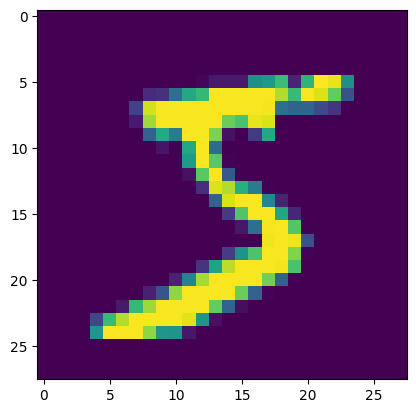

In [ ]:
print(Y_train[0])
print(X_train[0])


import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
X_train = X_train/255
X_test = X_test/255


In [ ]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu' ))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])
history = model.fit(X_train,Y_train, validation_split= 0.2 , epochs = 10  )

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2599 - accuracy: 0.9232 - val_loss: 0.1248 - val_accuracy: 0.9626
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1098 - accuracy: 0.9660 - val_loss: 0.0992 - val_accuracy: 0.9699
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0752 - accuracy: 0.9764 - val_loss: 0.0961 - val_accuracy: 0.9714
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0969 - val_accuracy: 0.9721
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0827 - val_accuracy: 0.9752
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9884 - val_loss: 0.0911 - val_accuracy: 0.9757
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0303 - accuracy: 0.9897 - val_loss: 0.1097 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

313/313 [==============================] - 1s 3ms/step


0.9722

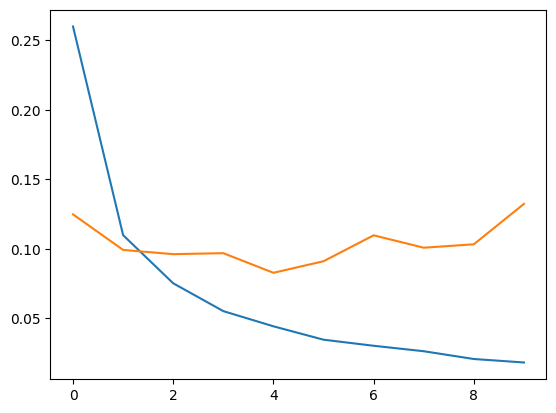

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

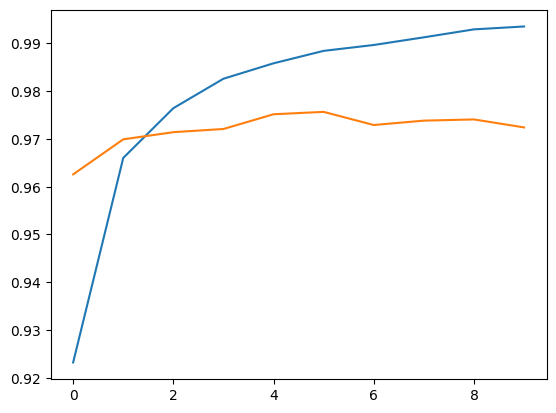

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])